In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
data = np.arange(10)

In [4]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


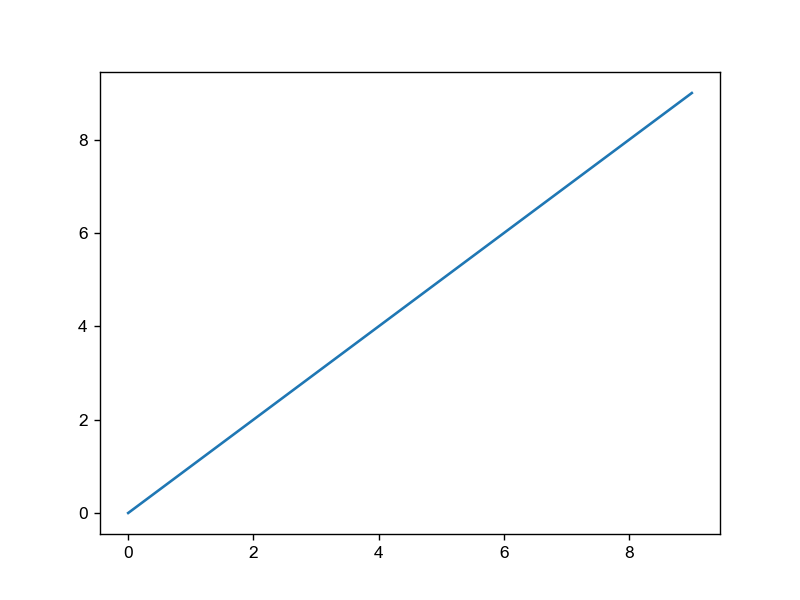

In [5]:
plt.plot(data)

While libraries like seaborn and pandas's built-in plotting functions will deal with many of the mundane details of making plots, should we wish to customize them beyond the function options provided, we will need to learn a bit about the matplotl-lib API

<h3>Figures and Subplots</h3>

Plots in matplotlib reside within a <b>Figure</b> object. We can create a new figure with plt.figure:

<IPython.core.display.Javascript object>


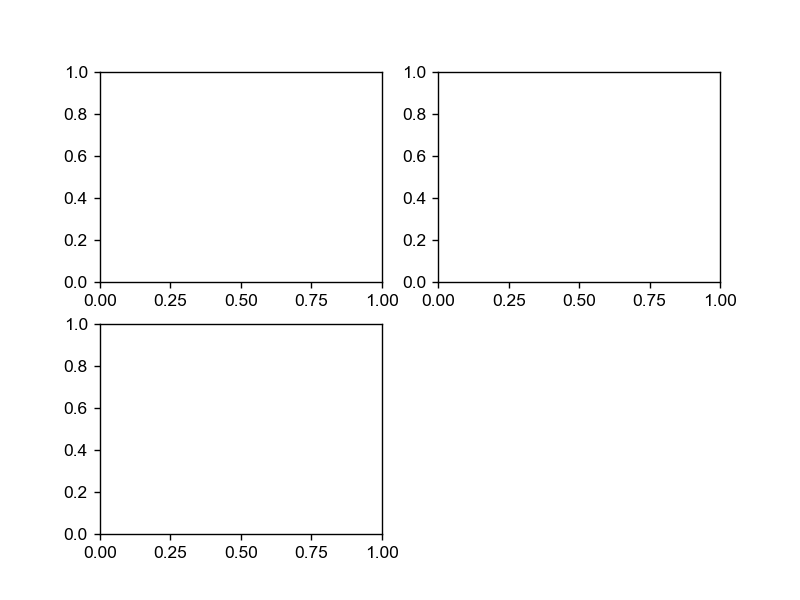

In [6]:
fig = plt.figure()

We can't make a plot with a blank figure. We have to create one or more subplots using <b>add_subplot</b>:

In [7]:
ax1 = fig.add_subplot(2,2,1)

This means that the figure should be 2 x 2 (so up to four plots in total), and we're selecting the first of four subplots(number from 1). If we create the next two subplots, we'll end up with a visualization that looks like in the above figure:

In [8]:
ax2 = fig.add_subplot(2,2,2)

In [9]:
ax3 = fig.add_subplot(2,2,3)

<b>Note: </b> One nuance of using Jupyter Notebooks is that plots are reset after each cell is evaluated, so for more complex plots we must put all of the plotting commands in a single notebook cell like in the example below:

<IPython.core.display.Javascript object>


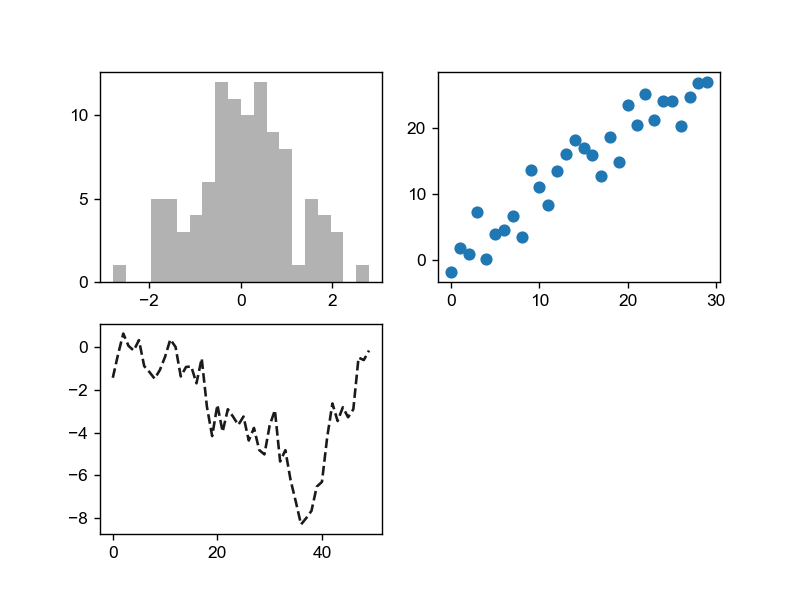

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

When we issue a plotting command like plt.plot([1.5, 3.5, -2, 1.6]), matplotlibs draws on the last figure and subplot used (creating one if necessary), thus hiding the figure and subplot creation. So if we add the following command, we'll get something like

In [11]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

The 'k--' is a style option instructing matplotlib to plot a black dashed line. The objects returned by fig.add_subplot here are <b>AxesSubplot</b> objects, on which we can directly plot on the other empty subplots by calling each one's instance method

In [12]:
_ = ax1.hist(np.random.randn(100), bins = 20, color ='k', alpha = 0.3 )

In [13]:
ax2.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))

<b>Note: We can find a comprehensive catalog of plot types in the matplotlib documentation</b>

Creating a figure with a grid of subplots is a very common task, so matplotlib includes a convenience method, plt.subplots, that creats a new figure and returns a Numpy array containing the created subplot objects:

<IPython.core.display.Javascript object>


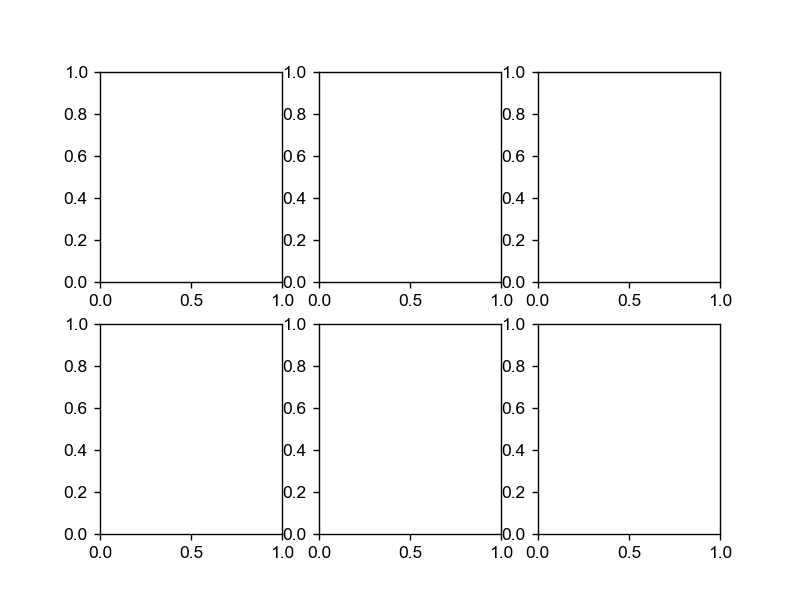

In [14]:
fig, axes = plt.subplots(2,3)

In [15]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

This is very useful, as the axes array can be easily indexed like a two-dimensional array; for example axes[0,1]. We can also indicate that subplots should have the same x- or y-axis using sharex and sharey, respectively. This is especially useful when we're comparing data on the same scale; otherwise, matplotlib autoscales plot limits independently.

![alt Text](Images/DataVisualization/dv_pyplot_subplots.png)

<h3>Adjusting the spacing around subplots</h3>

By default matplotlib leaves a certain amount of padding around the outside of the subplots and spacing between subplots. This spacing is all specified relative to the height and width of the plot, so that if we resize the plot either programmaticaly or manually using the GUI window, the plot will dynamically adjust  itself. We can change the spacing using the <b>subplots_adjust</b> method on <b>Figure</b> objects, also available as a top-level function:
<pre> subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

wspace and hspace controls the percent of the figure width and figure height, respectively, to use as spacing between subplots. 

<IPython.core.display.Javascript object>


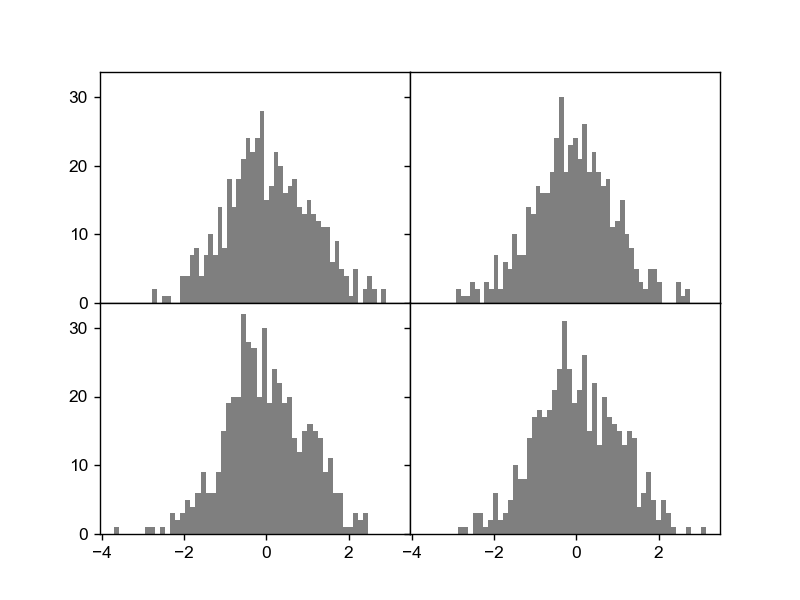

In [16]:
fig, axes = plt.subplots(2,2, sharex = True, sharey=True)

In [17]:
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins = 50, color='k', alpha = 0.5)
plt.subplots_adjust(wspace = 0, hspace=0)

<h3>Colors, Markers, and Line Styles</h3>

Matplotlib's main <b>plot</b> function accepts arrays of x and y coordinates and optionally a string abbreviation indicating color and line style. For example, to plot x versus y with green dashes, you would execute:
<pre>ax.plot(x,y, 'g--')</pre>
This way of specifying both color and line style in a string is provided as a convenience; in practice if we were cerating plots programmatically we might prefer not to have to munge strings together to create plots with the desired style. The same plot could also have been expressed more explicitely as:
<pre>ax.plot(x,y,linestyle='--', color= 'g')</pre>


Line plots can additionally have <b>markers</b> to highlight the actual data points. Since matplotlib creates a continuous line plot, interpolating between points, it can occasionally be unclear where the points lie. The marker can be part of the style string, which must have color followed by marker type and line style

In [18]:
from numpy.random import randn

<IPython.core.display.Javascript object>


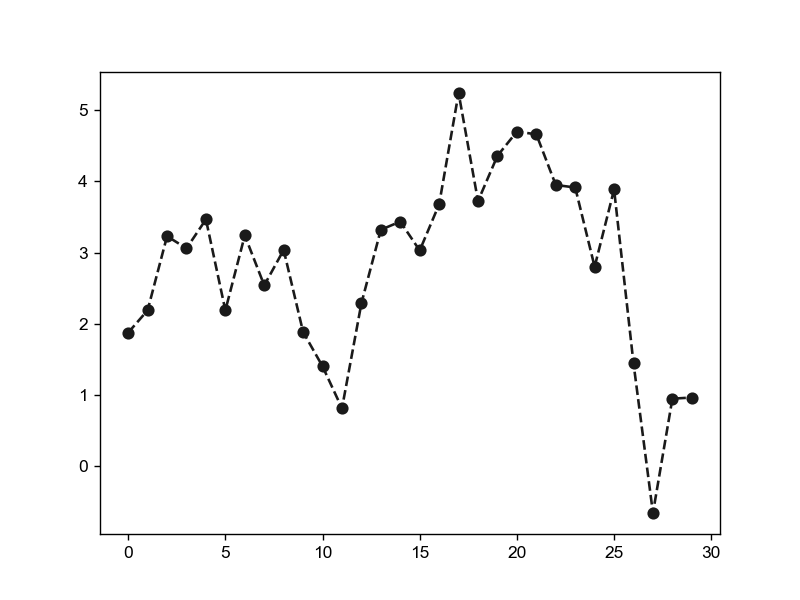

In [19]:
fig = plt.figure()
plt.plot(randn(30).cumsum(), 'ko--')

This could also have been written more explicitelly as:

<IPython.core.display.Javascript object>


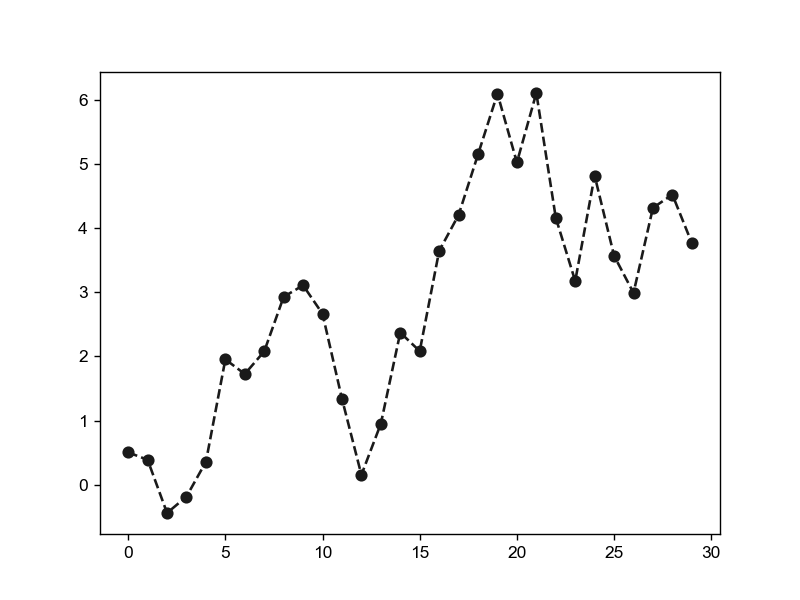

In [20]:
fig = plt.figure()
plt.plot(randn(30).cumsum(), color = 'k', linestyle = 'dashed', marker = 'o')

For line plots, we will notice that subsequent points are interpolated by default. This can be altered with the <b>drawstyle</b> option

<IPython.core.display.Javascript object>


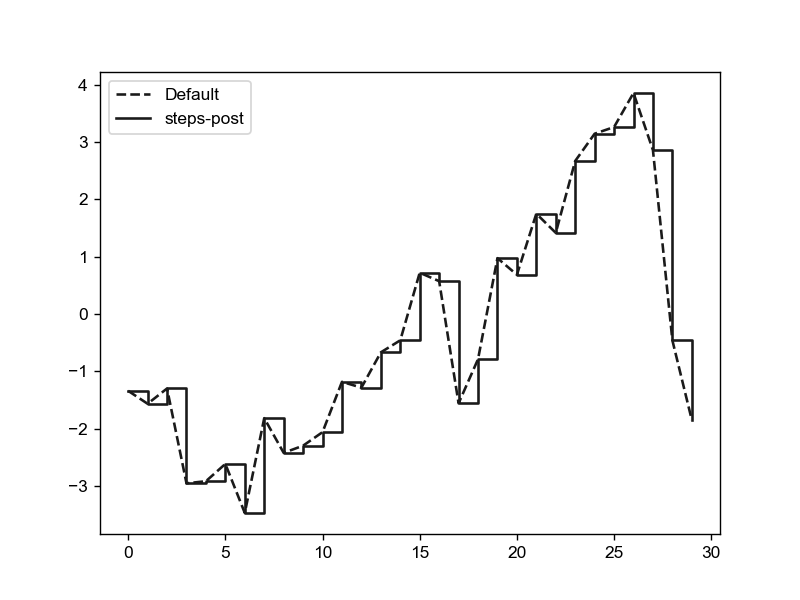

In [21]:
fig = plt.figure()
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label = 'Default')

In [22]:
plt.plot(data, 'k-', drawstyle='steps-post', label = 'steps-post')

In [23]:
plt.legend(loc='best')

<b>Note: </b> We must call <b>plt.legend</b> to create the legend, whether or not we passed the label options when plotting the data

<h3>Ticks, Labels, and Legends</h3>

The pyplot interface, designed for interactive use, consists of methods liek xlim, xticks, and xticklabels. These control the plot range, tick locations, and tick labels, respectively. They can be used in two ways:
<ul>
    <li>Called with no arguements returns the current parameter value (e.g, plt.xlim() returns the current x-axis plotting range)</li>
    <li>Called with parameters sets the parameter value (e.g, plt.xlim([0,10]), sets the x-axis range to 0 to 10)
 </ul>

All such methods act on the active or most recetnly created AxesSubplot. Each of them corresponds to two methods on the subplot object itself; in the case of xlim these are ax.get_xlim and ax.set_lim. It is preferrable to use the subplot instance methods in the interest of being explicit (and especially when working with multiple suplots), but we can certainly use whichever we find more convenient.

<h3>Setting the title, axis labels, ticks andticklabels</h3>

<IPython.core.display.Javascript object>


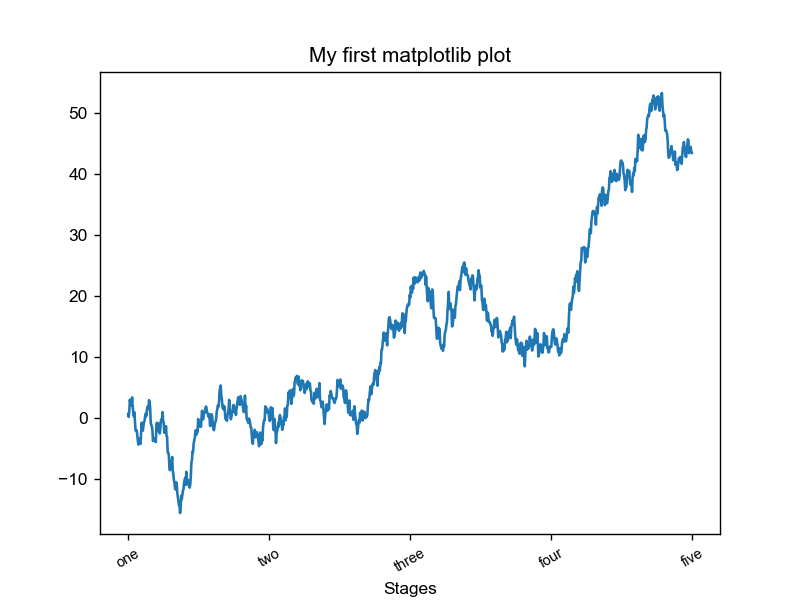

In [24]:
fig = plt.figure()


In [25]:
ax = fig.add_subplot(1,1,1)

In [26]:
ax.plot(np.random.randn(1000).cumsum())

To change the x-axis ticks, it is easiest to use set_xticks and set_xticklabels. The former insturcts matplotlib where to place the ticks along the data range; by default these locations will also be the labels. But we can set any other values as the labels using set_xticklabels:

In [27]:
ticks = ax.set_xticks([0,250,500,750,1000])

In [28]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], 
                           rotation = 30, fontsize = 'small')

The rotation option sets the x tick labels at a 30-degree rotation. Lastly, set_xlabel gives a name to the x-axis and set_title the subplot title

In [29]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

In [30]:
ax.set_xlabel('Stages')

Text(0.5, 0, 'Stages')

Modifying the y-axis consists of the same process, substituting y for x in the above. The axes class has a set method that allows batch setting of plot properties. From the prior example, we could also have written:

<IPython.core.display.Javascript object>


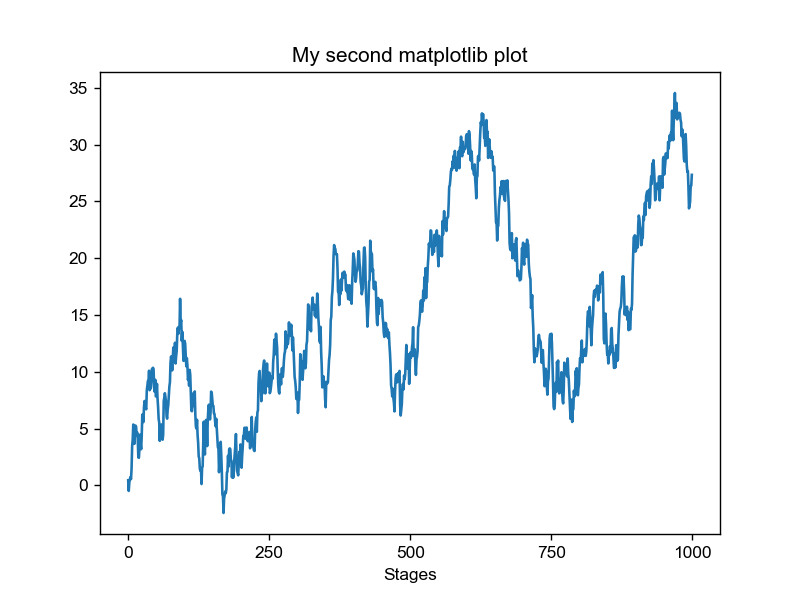

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0,250,500,750,1000])

In [32]:
props = {
    'title' : 'My second matplotlib plot',
    'xlabel' : 'Stages'
}
ax.set(**props)

[Text(0.5, 1.0, 'My second matplotlib plot'), Text(0.5, 0, 'Stages')]

<h3>Adding legends </h3>

Legends are another critical element for identifying plot elements. There are a couple of ways to add one. The easies is to pass the <b>label</b> arguement when adding each piece of the plot:

<IPython.core.display.Javascript object>


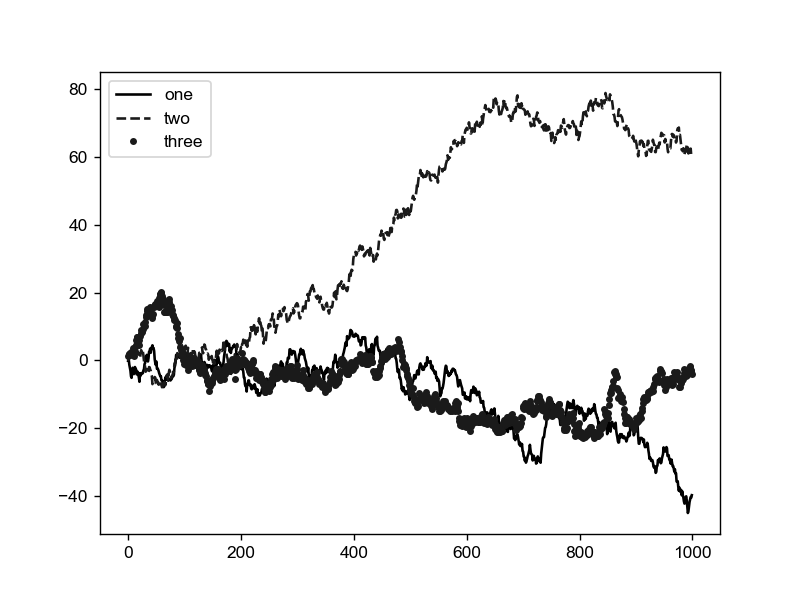

In [33]:
from numpy.random import randn
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [34]:
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label = 'two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

Once we've done this, we can either call ax.legend() or plt.legend() to automaticallly create a legend.

The loc tells matplotlib where to place the plot. If we aren't picky, 'best' is a good option, as it will choose a location that is most out of the way. To exclue one or more elements form the legend, pass no label or label = '_nolegend_'.

In [35]:
ax.legend(loc='best')

The legend method has several other choices for the location <b>loc</b> arguement. See the docstring with <b>ax.legend?</b> for more information

<h3>Annotations and Drawing on a Subplot</h3>

In addition to the standard plot types, we may wish to draw our own plot annotattions, which could consist of text, arrows, or other shapes. We can add annotations and text using the text, arrow, and annotate functions. text draws text at given coordinates(x,y) on the plot with optional custom styling:
<pre>
    ax.text(x,y, 'Hello world!', 
            family='monospace', fontsize=10)
</pre>

In [36]:
from datetime import datetime

<IPython.core.display.Javascript object>


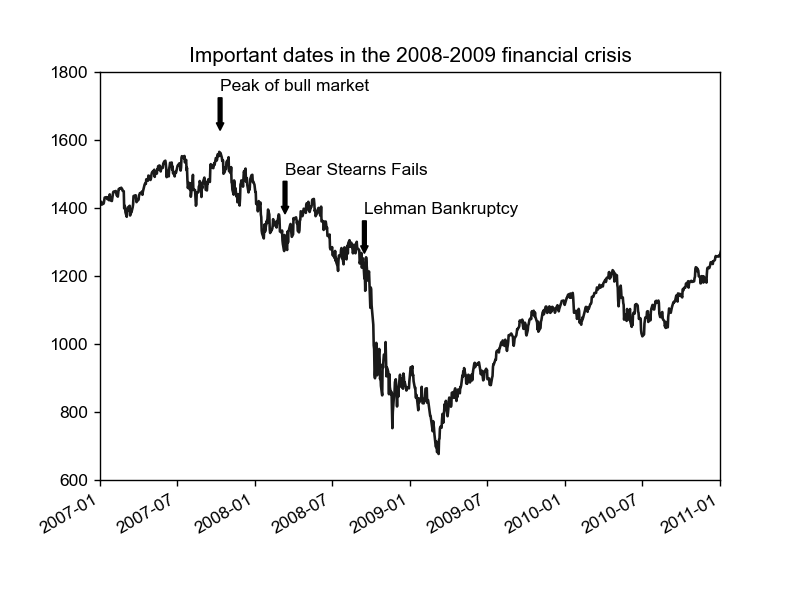

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [38]:
data = pd.read_csv('pydata-book-2nd-edition/examples/spx.csv', index_col = 0, parse_dates = True)
spx = data['SPX']

In [39]:
spx.plot(ax = ax, style='k-')

<AxesSubplot:>

In [40]:
crisis_data = [
    (datetime(2007,10,11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

In [41]:
for date, label in crisis_data:
    ax.annotate(label, xy = (date, spx.asof(date)+ 75),
               xytext = (date, spx.asof(date)+225),
               arrowprops = dict(facecolor='black', headwidth = 4, width = 2, 
                              headlength = 4),
               horizontalalignment = 'left', verticalalignment = 'top')

In [42]:
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600,1800])

(600.0, 1800.0)

In [43]:
ax.set_title('Important dates in the 2008-2009 financial crisis')

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

There are couple of important points to highlight in this plot: the ax.annotate method can draw labels at the indicated x and y coordiantes. We use the set_xlim and set_ylim methods to manually set the start and end boundaries for the plot rather than using matplotlib's default. Lastly, ax.set_title adds a main title to the plot.

Drawing shapes requires some more care. matplotlib has objects that represent many common shapes, referred to as patches. Some of these, like Rectangle and Circle, are found in <b>matplotlib.pyplot</b> , but the full set is located in <b>matplotlib.patches</b>

To add a shape to a plot, we create the patch obect shp and add it to a subplot by calling <b>ax.add_patch(shp)</b>

<IPython.core.display.Javascript object>


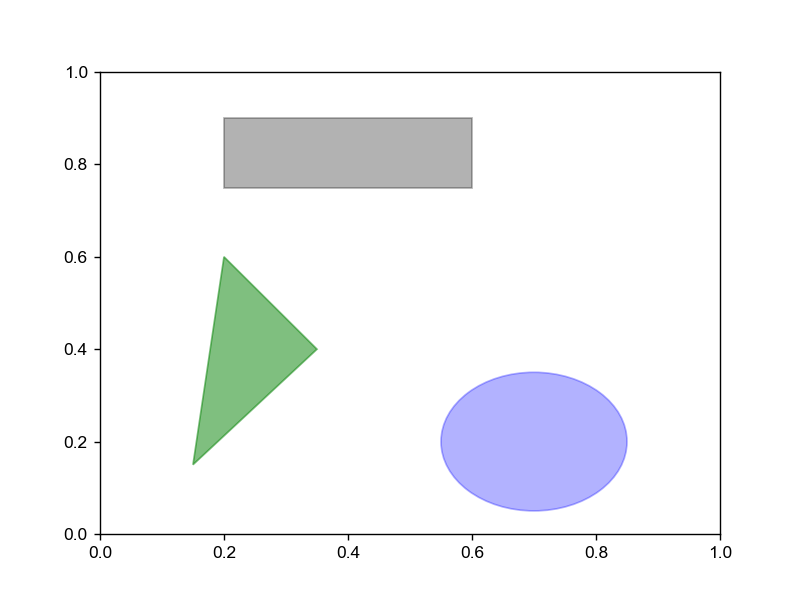

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
rect = plt.Rectangle((0.2,0.75), 0.4,0.15,color='k', alpha = 0.3)
circ = plt.Circle((0.7,0.2), 0.15, color = 'b', alpha = 0.3)
pgon = plt.Polygon([[0.15,0.15], [0.35,0.4], [0.2,0.6]],
                  color='g', alpha = 0.5)

In [45]:
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

<h3>Saving Plots to File</h3>

We can save the active figure to file using <b>plt.savefig. </b>. This method is equivalent to the figure object's savefig instance method. For examle, to save an SVG version of a figure, we only need to type:
<pre>
        plt.savefig('figpath.svg')
</pre>

This file type is inferred from the file extension. So if we used .pdf isntead, we would get a PDF. There are a couple of important options that is frequently used for publishing graphics: dpi, which controls the dots-per-inch resolution, and bbox_inches, which can trim the whitespace around the actua figure. To get the same plot as a PNG with minimal whitespace around the plot and at 400 DPI, we would do
<pre>
       plt.savefig('figpath.png', dpi = 400, bbox_inches = 'tight')
</pre>

![alt Text](Images/DataVisualization/dv_savefig.png)

<h3>matplotlib Configuration</h3>

matplotlib comes configure with color schemes and defaults that are geared primarily towards preparing figures for publication. Fortunately, nearly all of the default behavior can be customized via an extensive set of gloval parameters governing figure size, subplot spacing, colors, font sizes, grid styles, and so on.
One way to modify the configuration programmatically from PYthon is to use the <b>rc </b>method; for example to set the global default figure size to be 10x10, we could enter:

<pre>
        plt.rc('figure', figsize = (10,10))
</pre>

The first argument to rc is the component we wish to customize, such as 'figure', 'axes', 'xtick', 'ytick', 'grid',  'legend', or many others. After that we can follow a sequence of keyword arguments indicating the new parameters. An easy way to write down the options in our program is a dict:
<pre>
    font_optoins = {
        'familly': 'monospace',
        'weight': 'bold', 
        'size': 'small'
    }
    plt.rc('font', **font_options)
</pre>

<h3>Plotting with pandas and seaborn</h3>

matplotlib can be a fairly low-level tool. We assemble a plot from its base components: the data display (i.e the type of plot: line, bar, box, scatter, contour, etc.), legend, tick, tick labels, and other annotations.
In pandas we may have multiple columns of data, along with row and columns labels. pandas itself has built-in methods that simplify creating visualizations from DataFrame and Series objects. Another libraray is <b>seaborn</b>, a statistical graphics libraray created by  Micheal Waskom. Searborn simplifies creating many common visualization types.

<b>Note: Importing seaborn modifies the default matplotlib color schemes and plot styles to imporve readability and aesthetics. Even if we do not use seaborn API, we may prefer to import seaborn as a simple way to improve the visual aesthetics of general matplotlib plots

<h3>Line Plots</h3>

Series and DataFrame each have a plot attribute for making some basic plot types. By default, plot() makes line plots

In [46]:
s = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0,100,10))

<IPython.core.display.Javascript object>


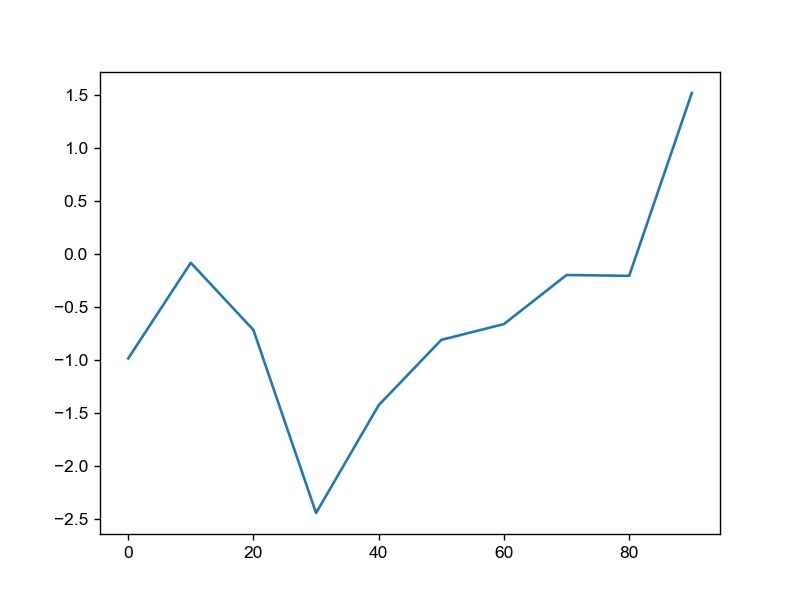

In [47]:
fig = plt.figure()

In [48]:
s.plot()

<AxesSubplot:>

The Series object's index is passed to matplotlib for plotting on the x-axis, though we can disable this by passing use_index = False. The x-axis ticks and limits can be adjusted with the xticks and xlim options, and y-axis respectively with yticks and ylim.

Most of pandas's plotting methods accept an optional ax parameter, which can be a matplotlib subplot object. This gives us more flexible placement of subplots in a grid layout.

DataFrame's plot method plots each of its columns as a different line on the same subplot, creating a legend automatically

<IPython.core.display.Javascript object>


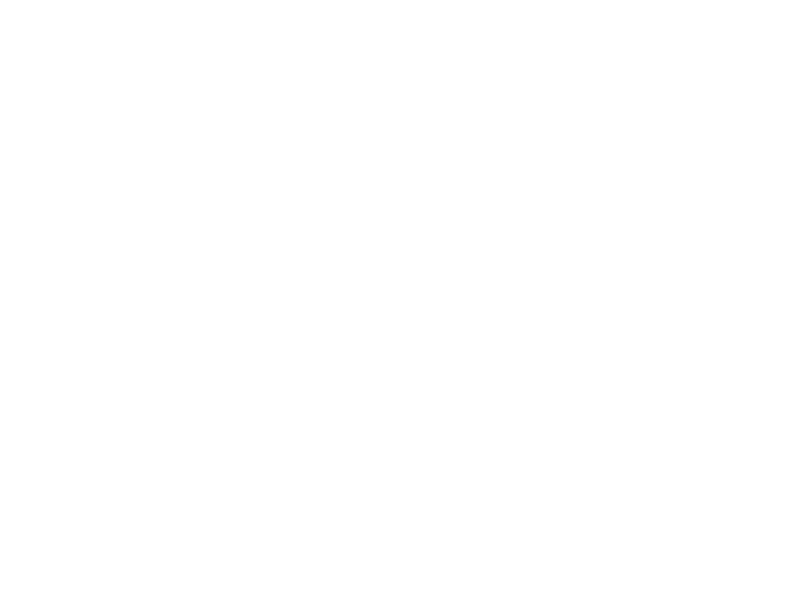

<IPython.core.display.Javascript object>


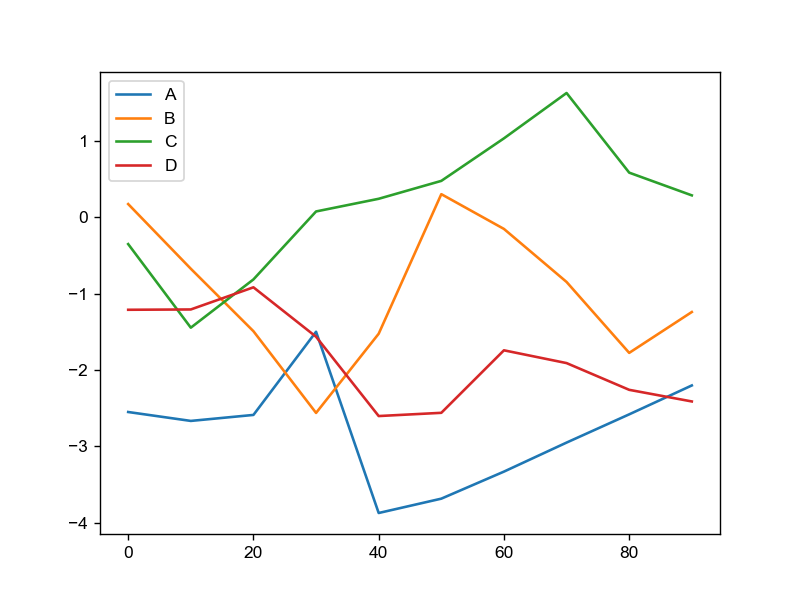

<AxesSubplot:>

In [49]:
fig = plt.figure()
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                 columns = ['A', 'B', 'C', 'D'],
                 index = np.arange(0,100,10))
df.plot()

The plot attribute contains a "family" of methods for different plot types. For examples, df.plot() is equivalent to df.plot.line().
We'll explore some of these methods next.

<b>Note:</b> Additional keyword arguments to plot are passed through to the respective matplotlib plotting function, so we can further customize these plots by learning more about the matplotlib API.

![alt Text](Images/DataVisualization/dv_series_plot.png)

DataFrame has a number of options allowing some flexibility with how the columns are handled; for example, whether to plot them all on the same subplot or to create separate subplots.

![alt Text](Images/DataVisualization/dv_dataframe_plot.png)

<h3>Bar Plots </h3>

The plot.bar() and plot.barh() make vertical and horizontal bar plots, respectively. In this case, the Series or DataFrame index will be used as the x (bar) or y (barh) ticks

<IPython.core.display.Javascript object>


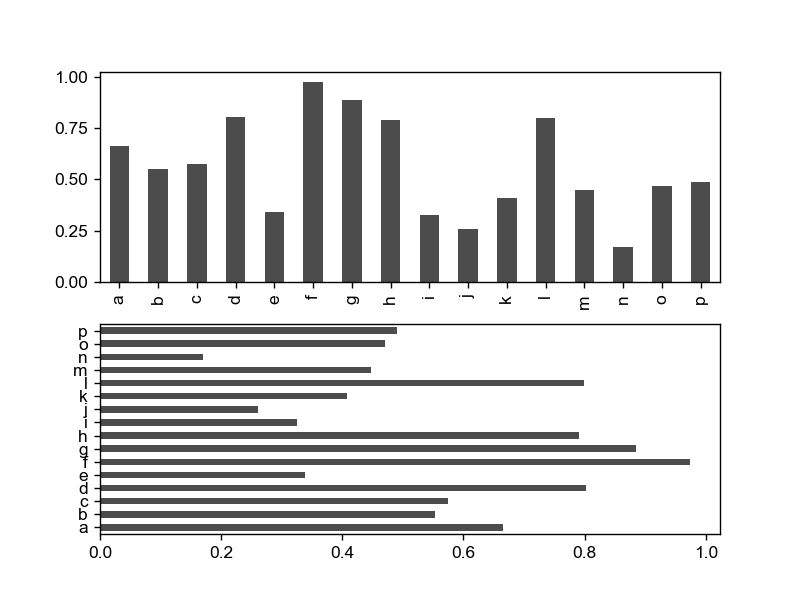

In [50]:
fig, axes = plt.subplots(2,1)

In [51]:
data = pd.Series(np.random.rand(16), index = list('abcdefghijklmnop'))

In [52]:
data.plot.bar(ax = axes[0], color='k', alpha = 0.7)

<AxesSubplot:>

In [53]:
data.plot.barh(ax = axes[1], color='k', alpha = 0.7)

<AxesSubplot:>

The options color = 'k' and alpha = 0.7 set the color of the plots to black and use partial transparency on the filling.

With a DataFrame, bar plots group the values in each row together in a group in bars, side by side, for each value. 

In [54]:
df = pd.DataFrame(np.random.rand(6,4), 
                 index = ['one', 'two', 'three', 'four', 'five', 'six'],
                 columns = pd.Index(['A', 'B', 'C', 'D'],
                                   name = 'Genus'))

In [55]:
df

Genus,A,B,C,D
one,0.554938,0.064551,0.520769,0.052490
two,0.164230,0.350834,0.145042,0.902089
three,0.247663,0.496171,0.549021,0.811686
four,0.367516,0.409774,0.705261,0.108730
five,0.065901,0.248526,0.586651,0.933351
six,0.627618,0.272458,0.757703,0.857375


<IPython.core.display.Javascript object>


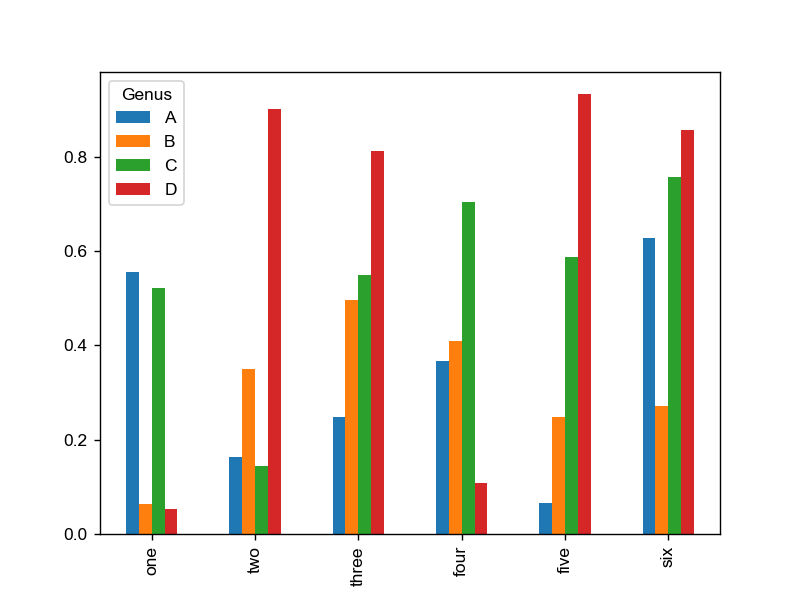

<AxesSubplot:>

In [56]:
df.plot.bar()

<b>Note: The name "Genus" on the DataFrame's columns is used to title the legend. </b>

We create stacked bar plots from a DataFrame by passing stackd = True, resulting in the value in each row being stacked together.

<IPython.core.display.Javascript object>


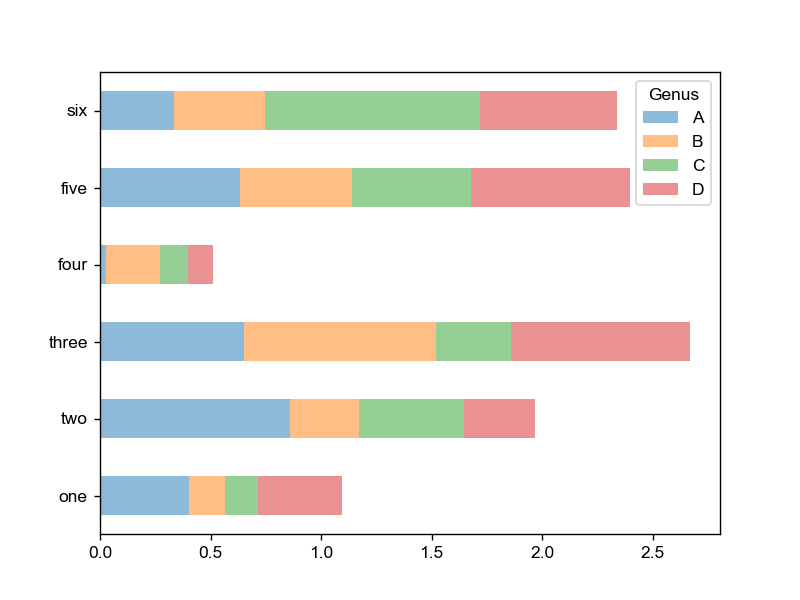

<AxesSubplot:>

In [57]:
df = pd.DataFrame(np.random.rand(6,4), 
                 index = ['one', 'two', 'three', 'four', 'five', 'six'],
                 columns = pd.Index(['A', 'B', 'C', 'D'],
                                   name = 'Genus'))
df.plot.barh(stacked=True, alpha = 0.5)

<b>Note: A useful recipe for bar plots is to visualize a Series's value frequency using value_counts: s.value_counts().plot.bar()

Returning to the tipping dataset used earlier in the book, suppose we wanted to make stacked bar plot showing the percentage of data points for each party size on each day. First, load the data using read_csv and make a cross-tabulation by day and party size:

In [58]:
tips = pd.read_csv('pydata-book-2nd-edition/examples/tips.csv')

In [59]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [60]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [61]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [62]:
party_counts = party_counts.loc[:, 2:5]

In [63]:
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


Then, normalize so that each row sums to 1 and make the plot

In [64]:
party_pcts = party_counts.div(party_counts.sum(1), axis = 0)

In [65]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


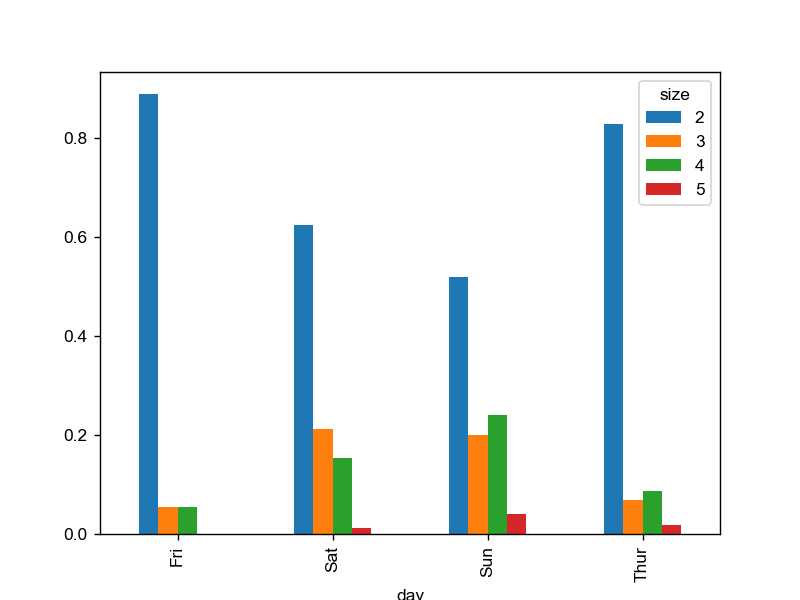

<AxesSubplot:xlabel='day'>

In [66]:
party_pcts.plot.bar()

With data that requires aggregation or summarization before making a plot, using the <b>seaborn</b> package can make things much simpler. Let's look now at the tipping percentage by day with seaborn

In [67]:
import seaborn as sns

In [68]:
tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])

In [69]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


C:\Users\Predator\Anaconda3\envs\data_analysis\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


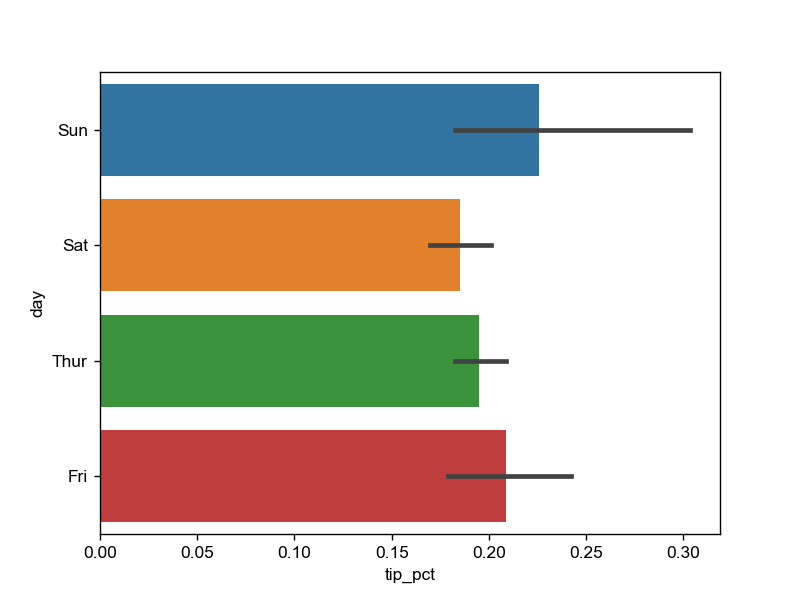

In [70]:
fig = plt.figure()

In [71]:
sns.barplot(x='tip_pct', y='day', data = tips, orient = 'h')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

Plotting functions in seaborn take a data argument, which can be a pandas DataFrame. The other arguments refer to column names. Because there are multiple observations for each value in the day, the bars are the averaage value of tip_pct. The black lines drawn on the bars represent the 95% confidence interval.

seaborn.barplot has a <b>hue</b> option that enables us to split by an additional categorail value

In [72]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


In [73]:
tips['tip_pct']

0      0.063204
1      0.191244
2      0.199886
3      0.162494
4      0.172069
         ...   
239    0.256166
240    0.079428
241    0.096759
242    0.108899
243    0.190114
Name: tip_pct, Length: 244, dtype: float64

<IPython.core.display.Javascript object>


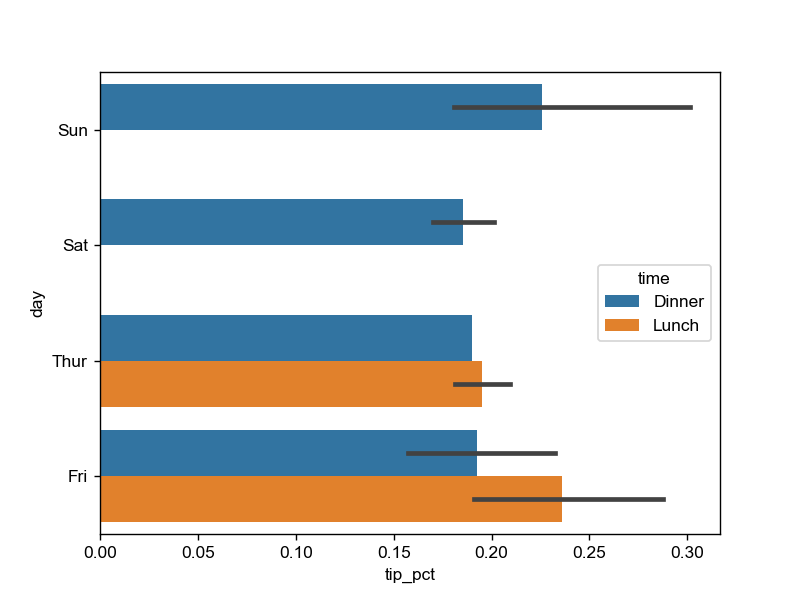

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [74]:
fig = plt.figure()
sns.barplot(x='tip_pct', y='day', hue = 'time', data= tips, orient = 'h')

Notice that seaborn has automatically changed the aesthetics of plots: the default color paletter, plot background, and grid line colors. We can switch between different plot appearances using seaborn.set:

In [75]:
sns.set(style='whitegrid')

<h3>Histograms and Density Plots</h3>

A histogram is a kind of bar plot that gives a discretized display of value frequency. The data points are split into discrete, evenly spaced bins, and the number of data points in each bin is plotted. Using the tipping data from before, we can make a historgram of tip percentages of the total bill using the <b>plot.hist()</b> method on the Series

In [76]:
tips['tip_pct']

0      0.063204
1      0.191244
2      0.199886
3      0.162494
4      0.172069
         ...   
239    0.256166
240    0.079428
241    0.096759
242    0.108899
243    0.190114
Name: tip_pct, Length: 244, dtype: float64

<IPython.core.display.Javascript object>


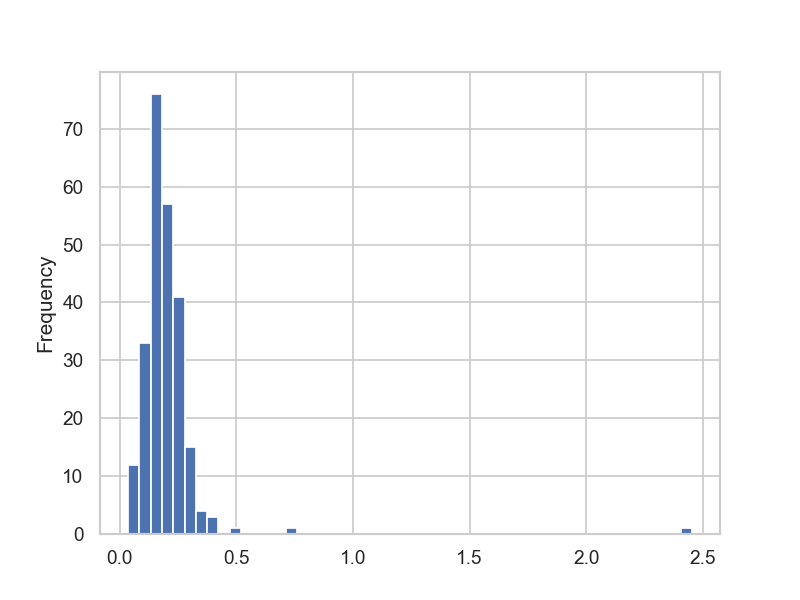

<AxesSubplot:ylabel='Frequency'>

In [77]:
fig = plt.figure()
tips['tip_pct'].plot.hist(bins=50)

A related plot type is a density plot, which is formed by computing an estimate of a continuous probability distribution that might have generated the observed data. The usual procedure is to approximate this distribution as a mixture of "kernels" - that is, simpler distributions like the normal distribution. Thus, density plots are also known as kernel density estimate (KDE) plots. Using plot.kde makes a density plot using the conventional mixture of normals estimate

<IPython.core.display.Javascript object>


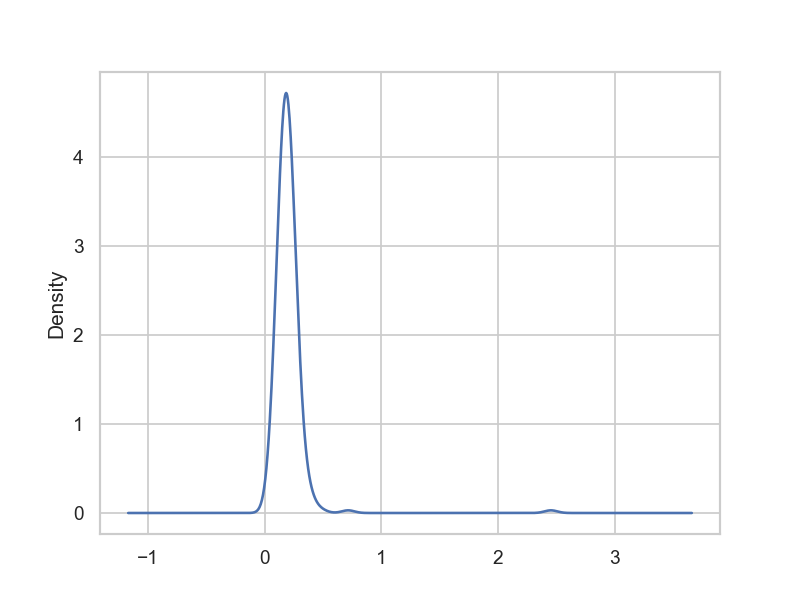

<AxesSubplot:ylabel='Density'>

In [78]:
fig = plt.figure()
tips['tip_pct'].plot.density()

Seaborn makes histogram and density plots even easier through its <b>distplot</b>, which can plot both a histogram and a continuous density estimate simulataneously. As an example, consider a bimodal distribution consisting of draws from two different standard normal distributions

In [79]:
comp1 = np.random.normal(0,1,size = 200)

In [80]:
comp2 = np.random.normal(10,2,size = 200)

In [81]:
values = pd.Series(np.concatenate([comp1, comp2]))

<IPython.core.display.Javascript object>


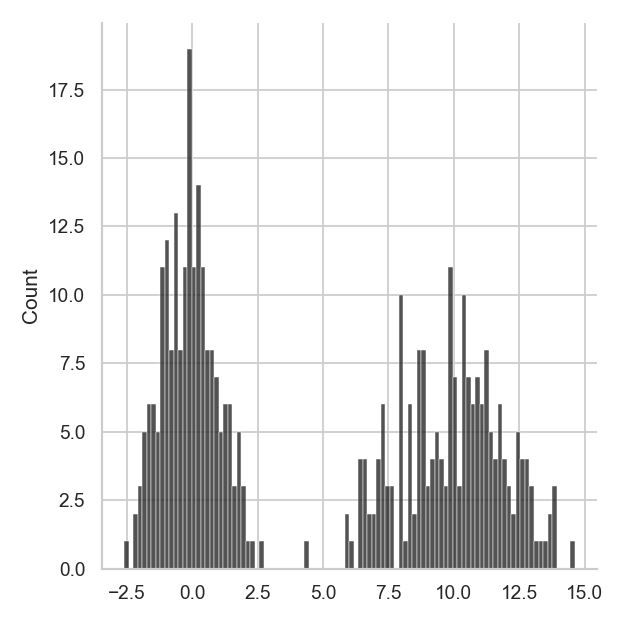

In [82]:
sns.displot(values, bins = 100, color='k')

<h3>Scatter or Point Plots</h3>

Point plots or scatter plots can be a useful way of examining the relationship between two one-dimensional data series. For example, here we load the macrodata dataset from the statsmodels project, select a few variables, then compute log differences:

In [83]:
macro = pd.read_csv('pydata-book-2nd-edition/examples/macrodata.csv')

In [84]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [85]:
data

,cpi,m1,tbilrate,unemp
0,28.980,139.7,2.82,5.8
1,29.150,141.7,3.08,5.1
2,29.350,140.5,3.82,5.3
3,29.370,140.0,4.33,5.6
4,29.540,139.6,3.50,5.2
...,...,...,...,...
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2


In [86]:
trans_data = np.log(data).diff().dropna()

In [87]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


We can then use seaborn's regplot method, which makes a scatter plot and fits a linear regression line

<IPython.core.display.Javascript object>


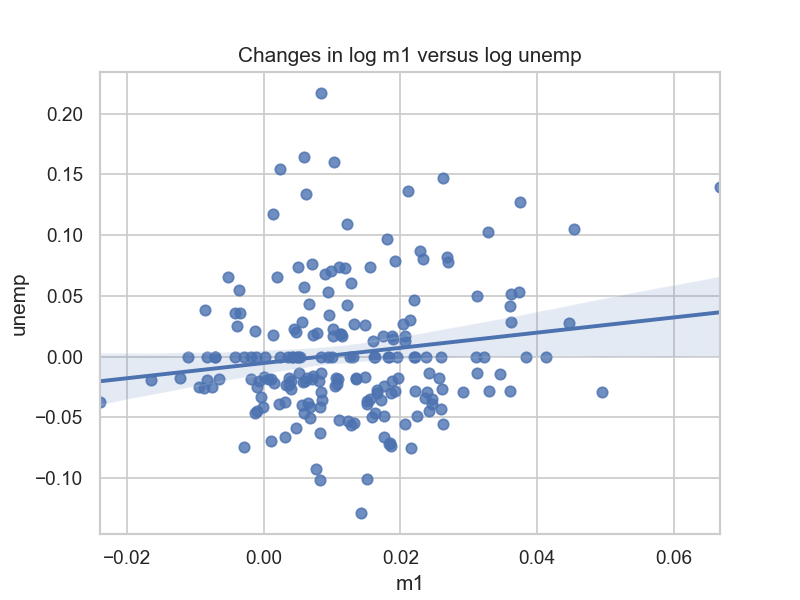

C:\Users\Predator\Anaconda3\envs\data_analysis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='m1', ylabel='unemp'>

In [88]:
fig = plt.figure()
sns.regplot('m1', 'unemp', data = trans_data)

In [89]:
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

In exploratory data analysis it's helpful to be able to look at all the scatter plots among a group of varaibles; this is known as pairs plot or <b>scatter plot matrix</b>. Making such a plot from scratch is a bit of work, so seaborn has a convenient <b>pairplot</b> function, which supports plcaing histograms or density estimates of each variable along the diagonal

<IPython.core.display.Javascript object>


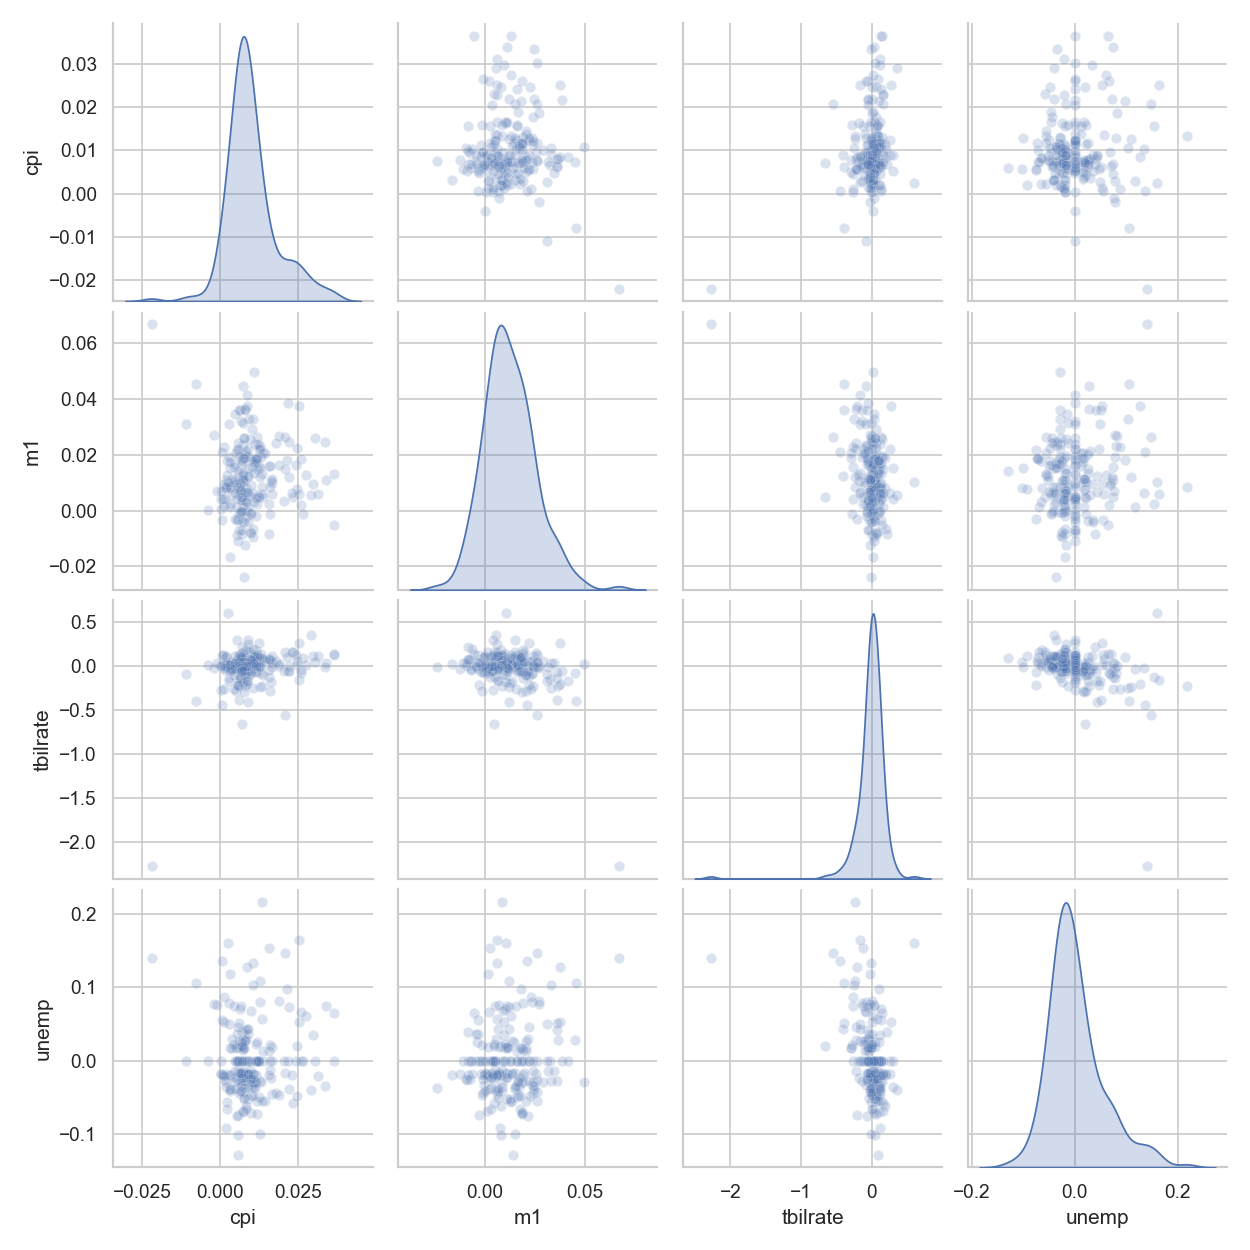

In [90]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha':0.2})

<h3>Facet Grids and Categorical Data</h3>

What about datasets where we have additional grouping dimensions? One way to visualize data with many categorical variables is to use a facet grid. Seaborn has a useful built-in function factorplot that simplifies making many kinds of faceted plots 

C:\Users\Predator\Anaconda3\envs\data_analysis\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


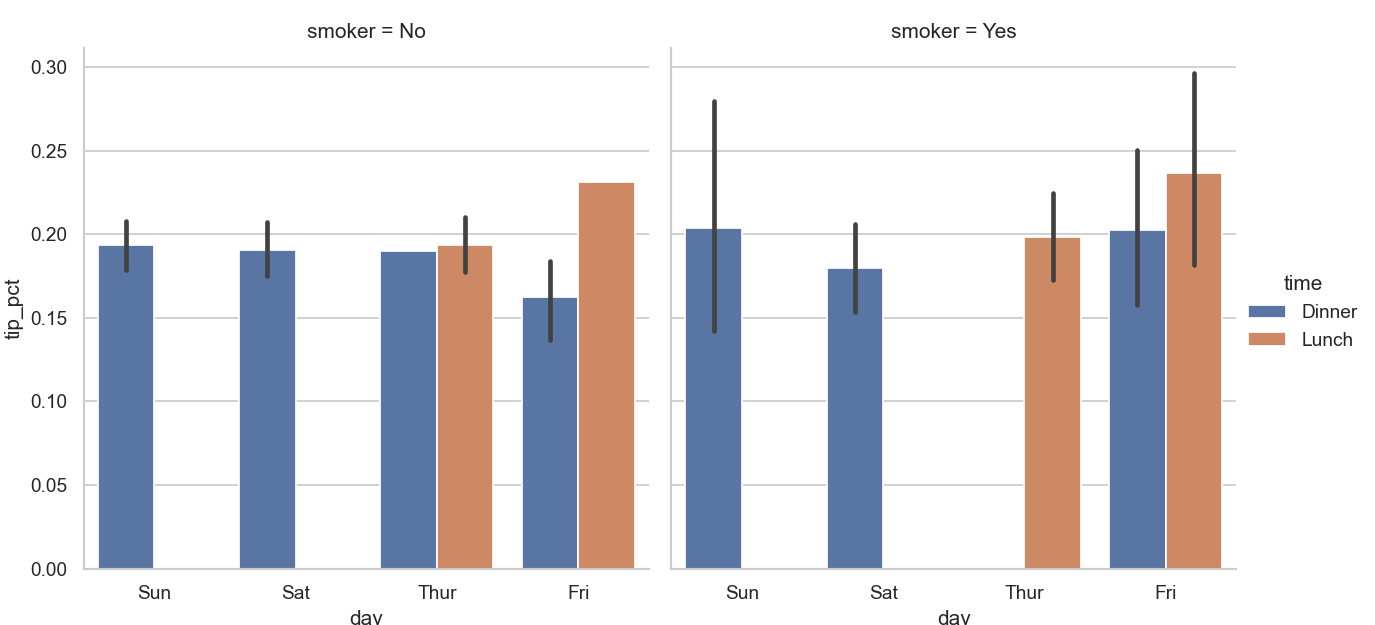

In [91]:
sns.factorplot(x='day', y='tip_pct', hue = 'time', col='smoker',
              kind='bar', data = tips[tips.tip_pct < 1])

Instead of grouping by 'time' by different bar colors within a facet, we can also expand the facet grid by adding one row per time value

C:\Users\Predator\Anaconda3\envs\data_analysis\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


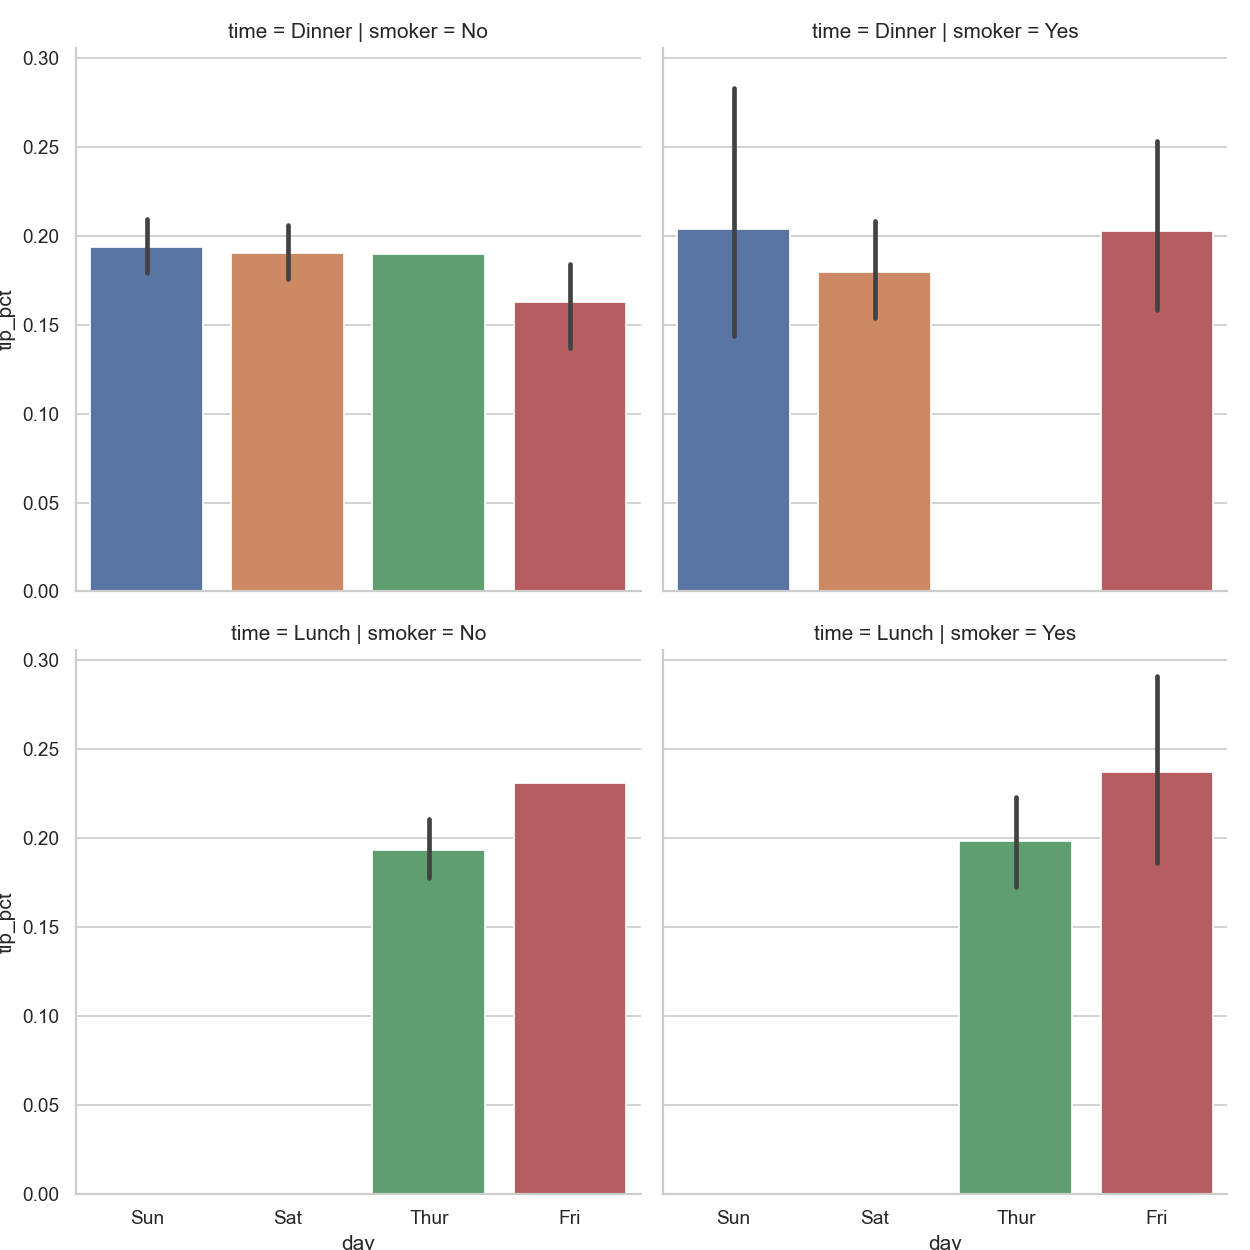

In [92]:
sns.factorplot(x='day', y='tip_pct', row='time',
              col='smoker',
              kind = 'bar', 
              data = tips[tips.tip_pct < 1])

factorplot supporst other plot types that may be useful depending on what we are trying to display. For example, box plots (whcih show the median, quartiles, and outliers) can be effective visualization type

C:\Users\Predator\Anaconda3\envs\data_analysis\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


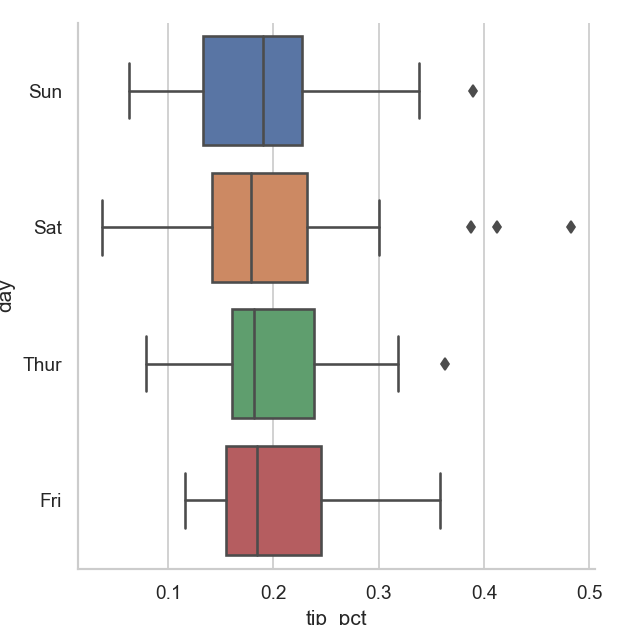

In [93]:
sns.factorplot(x='tip_pct', y='day', kind='box', 
              data = tips[tips.tip_pct < 0.5])